# DAML 08 - t-SNE

Michal Grochmal <michal.grochmal@city.ac.uk>

t-distributed Stochastic Neighbor Embedding is a manifold technique originated
by Geoffrey Hinton and Laurens van der Maaten.  It uses a probabilistic distribution
to measure distances between points in a dataset (high probability means short distance
and low probability long distance).  It then attempts to keep these distances during
transformation.

t-SNE is considerably different from a decomposition technique such as PCA:

-   Has no inverse transform (this is often the case with manifold techniques)

-   The number of components is always much smaller than the number of dimensions
    in the original data.  Since this originally a visualization technique,
    most often you will only see 2 or 3 components

-   Since it is a stochastic technique the result is considerably different
    depending on the initial (random) state, or even the ordering of the input data

Let's see how t-SNE performs on the MNIST handwritten digits:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
sns.set()
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.metrics.pairwise import pairwise_distances

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

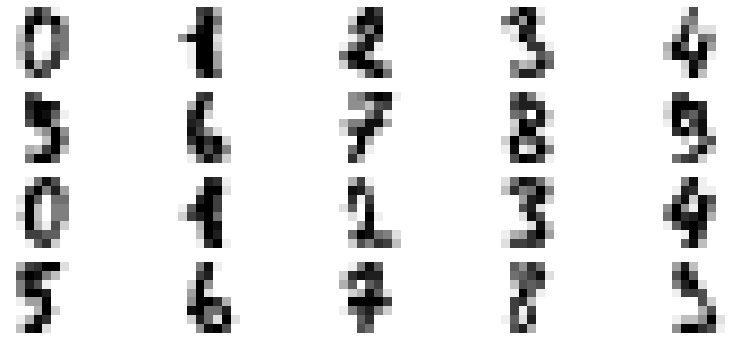

In [3]:
sample = digits.data[:20].reshape(20, 8, 8)
fig, axes = plt.subplots(4, 5, figsize=(14, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(sample[i], cmap='binary')
    ax.set(xticks=[], yticks=[])

In [4]:
proj = TSNE(n_components=2).fit_transform(digits.data)  # this will take a while

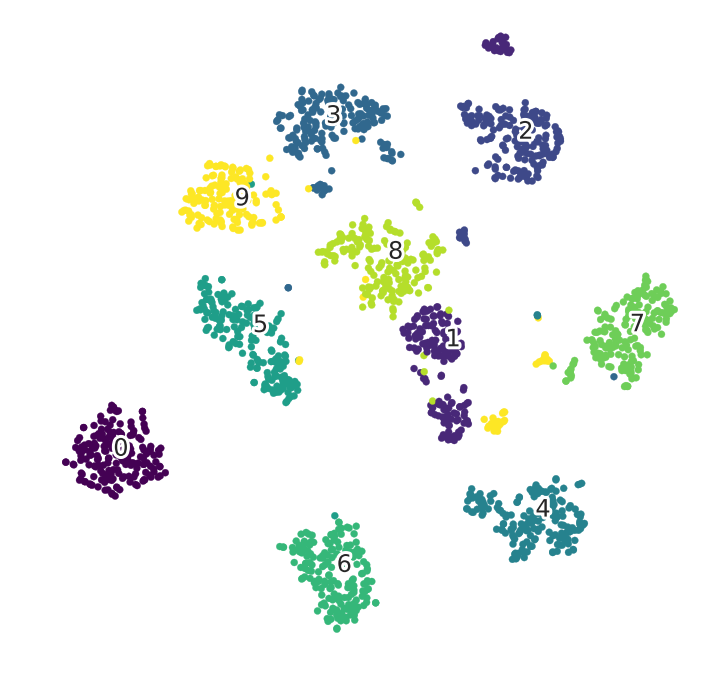

In [5]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap='viridis')
ax.axis('off')
for i in range(10):
    xtext, ytext = np.median(proj[digits.target == i, :], axis=0)
    txt = ax.text(xtext, ytext, str(i), fontsize=24)
    txt.set_path_effects([
        PathEffects.Stroke(linewidth=6, foreground='white'), PathEffects.Normal()])

In [6]:
data = np.vstack([digits.data[digits.target==i] for i in range(10)])
y = np.hstack([digits.target[digits.target==i] for i in range(10)])
proj_ordered = TSNE(n_components=2).fit_transform(data)

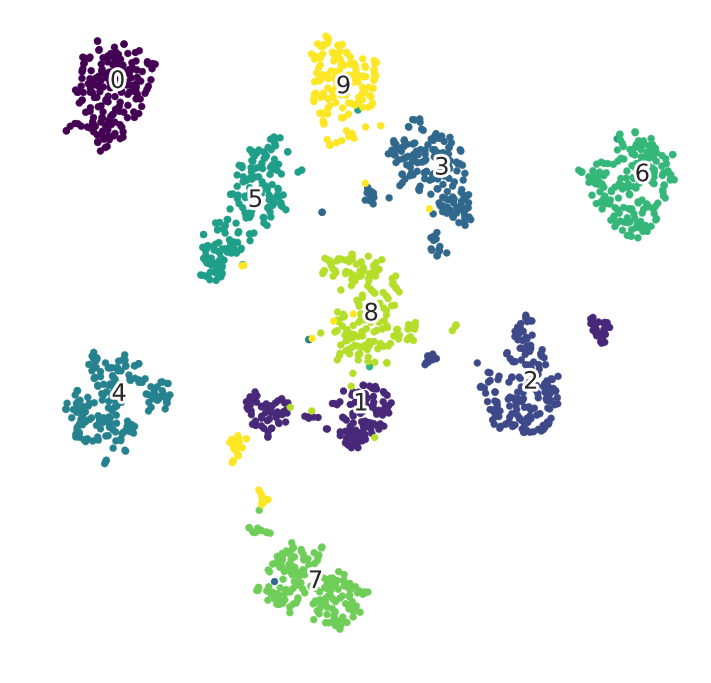

In [7]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(proj_ordered[:, 0], proj_ordered[:, 1], c=y, cmap='viridis')
ax.axis('off')
for i in range(10):
    xtext, ytext = np.median(proj_ordered[y == i, :], axis=0)
    txt = ax.text(xtext, ytext, str(i), fontsize=24)
    txt.set_path_effects([
        PathEffects.Stroke(linewidth=6, foreground='white'), PathEffects.Normal()])

## Extra: Image Features

Working with images we have been using pixel values as input to our models.
That is one way of doing things but it isn't the most effective way in practice.
Years of computer vision research did produce techniques for feature extraction
that easily outperform any form of PCA or fold learning.  The `skikit-image`
library is a collection of several of these computer vision techniques.
Some examples include:

- Sobel filter
- Canny filter
- Watershed segmentation

These often work as *kernel methods* and by *convolution*.